In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.cm as cm
from sklearn.feature_selection import f_regression
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from tabulate import tabulate
import tabulatehelper as th

In [2]:
data = pd.read_csv('../data/NBA_Players.csv')
data.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PF,PTS,Potw,APG_Leader,MVP,PPG_Leader,RPG_Leader,Rookie,WS_Leader,Salary
0,1991,Alaa Abdelnaby,PF,22.0,POR,43,0,6.7,1.3,2.7,...,0.9,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,395000
1,1991,Mahmoud Abdul-Rauf,PG,21.0,DEN,67,19,22.5,6.2,15.1,...,2.2,14.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1660000
2,1991,Mark Acres,C,28.0,ORL,68,0,19.3,1.6,3.1,...,3.2,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437000
3,1991,Michael Adams,PG,28.0,DEN,66,66,35.5,8.5,21.5,...,2.5,26.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,825000
4,1991,Mark Aguirre,SF,31.0,DET,78,13,25.7,5.4,11.7,...,2.7,14.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1115000


In [3]:
col_salary = ['Year', 'Potw', 'APG_Leader', 'MVP', 'PPG_Leader', 'RPG_Leader', 'Rookie', 'WS_Leader']

#### Full Model

In [4]:
formula_1 = f'Salary ~ {" + ".join(list(col_salary))}'
lm1 = smf.ols(formula_1, data = data).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     338.4
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:01:39   Log-Likelihood:            -1.5001e+05
No. Observations:                9003   AIC:                         3.000e+05
Df Residuals:                    8994   BIC:                         3.001e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.726e+08   1.05e+07    -35.504      0.000   -3.93e+08   -3.52e+08
Year        1.874e+05   5231.501     35.823      0.000    1.77e+05    1.98e+05
Potw        6.327e+06   2.01e+05     31.404      0.000    5.93e+06    6.72e+06
APG_Leader  4.374e+06   1.05e+06      4.165      0.000    2.32e+06    6.43e+06
MVP         1.353e+06   1.14e+06      1.182      0.237    -8.9e+05     3.6e+06
PPG_Leader  3.988e+06   9.28e+05      4.295      0.000    2.17e+06    5.81e+06
RPG_Leader  4.677e+06   7.99e+05      5.856      0.000    3.11e+06    6.24e+06
Rookie     -2.054e+06    9.6e+05     -2.140      0.032   -3.94e+06   -1.73e+05
WS_Leader   2.213e+06   1.16e+06      1.916      0.055   -5.16e+04    4.48e+06
==============================================================================
Omnibus:                     3646.378   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18043.676
Skew:                           1.922   Prob(JB):                         0.00
Kurtosis:                       8.773   Cond. No.                     4.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

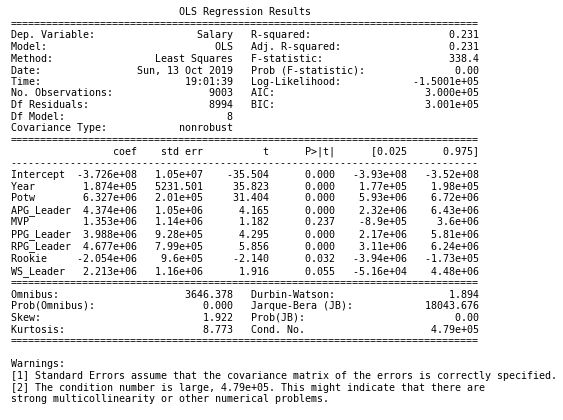

In [5]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm1.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_2_summary_model1.png', dpi = 300, bbox_inches = 'tight')

In [6]:
print(th.md_table(anova_lm(lm1).reset_index(), formats = {-1: 'c'}))

| index      |   df |      sum_sq |     mean_sq |          F |         PR(>F) |
|:-----------|-----:|------------:|------------:|-----------:|:--------------:|
| Year       |    1 | 2.3164e+16  | 2.3164e+16  | 1330.82    |   7.34954e-272 |
| Potw       |    1 | 2.21228e+16 | 2.21228e+16 | 1271       |   1.67026e-260 |
| APG_Leader |    1 | 2.89658e+14 | 2.89658e+14 |   16.6414  |   4.55432e-05  |
| MVP        |    1 | 3.69627e+14 | 3.69627e+14 |   21.2359  |   4.11687e-06  |
| PPG_Leader |    1 | 4.0067e+14  | 4.0067e+14  |   23.0193  |   1.6296e-06   |
| RPG_Leader |    1 | 6.31608e+14 | 6.31608e+14 |   36.2872  |   1.76961e-09  |
| Rookie     |    1 | 8.00524e+13 | 8.00524e+13 |    4.59918 |   0.032014     |
| WS_Leader  |    1 | 6.38674e+13 | 6.38674e+13 |    3.66932 |   0.0554546    |
| Residual   | 8994 | 1.56548e+17 | 1.74058e+13 |  nan       | nan            |


#### Check Non-Linearity

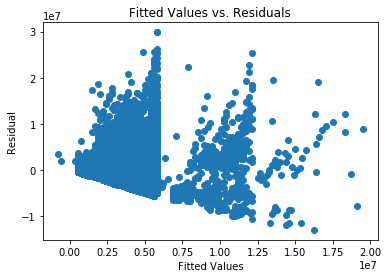

In [7]:
p = lm1.fittedvalues
res = lm1.resid
plt.scatter(p, res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
plt.savefig('../plot/regression_2_residual_model1.png', dpi = 300, bbox_inches = 'tight')

#### Log Transform `y` due to non-linearity

In [8]:
data_log = data.copy()
data_log.Salary = np.log(data_log.Salary)
data_log.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PF,PTS,Potw,APG_Leader,MVP,PPG_Leader,RPG_Leader,Rookie,WS_Leader,Salary
0,1991,Alaa Abdelnaby,PF,22.0,POR,43,0,6.7,1.3,2.7,...,0.9,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.886641
1,1991,Mahmoud Abdul-Rauf,PG,21.0,DEN,67,19,22.5,6.2,15.1,...,2.2,14.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.322328
2,1991,Mark Acres,C,28.0,ORL,68,0,19.3,1.6,3.1,...,3.2,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.987688
3,1991,Michael Adams,PG,28.0,DEN,66,66,35.5,8.5,21.5,...,2.5,26.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.623139
4,1991,Mark Aguirre,SF,31.0,DET,78,13,25.7,5.4,11.7,...,2.7,14.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.924365


#### Refit Full Model

In [9]:
formula_2 = f'Salary ~ {" + ".join(list(col_salary))}'
lm2 = smf.ols(formula_2, data = data_log).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     241.3
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:01:40   Log-Likelihood:                -14245.
No. Observations:                9003   AIC:                         2.851e+04
Df Residuals:                    8994   BIC:                         2.857e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -88.1389      2.963    -29.744      0.000     -93.948     -82.330
Year           0.0511      0.001     34.585      0.000       0.048       0.054
Potw           1.3214      0.057     23.226      0.000       1.210       1.433
APG_Leader     0.6687      0.297      2.255      0.024       0.087       1.250
MVP            0.0916      0.323      0.284      0.777      -0.542       0.725
PPG_Leader     0.5126      0.262      1.955      0.051      -0.001       1.026
RPG_Leader     0.8803      0.225      3.904      0.000       0.438       1.322
Rookie         0.1315      0.271      0.485      0.627      -0.400       0.663
WS_Leader      0.3642      0.326      1.116      0.264      -0.275       1.004
==============================================================================
Omnibus:                      842.715   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.483
Skew:                          -0.709   Prob(JB):                    8.06e-282
Kurtosis:                       4.200   Cond. No.                     4.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

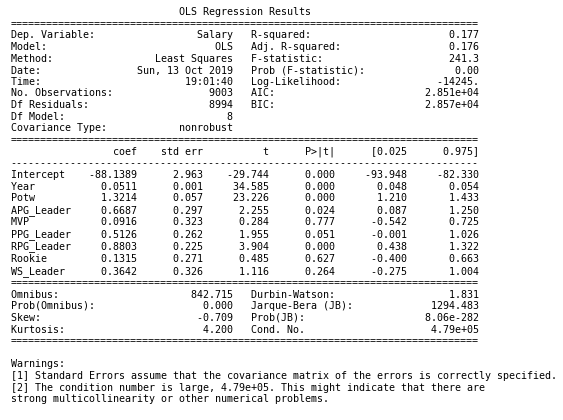

In [10]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm2.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_2_summary_model2.png', dpi = 300, bbox_inches = 'tight')

In [11]:
print(th.md_table(anova_lm(lm2).reset_index(), formats = {-1: 'c'}))

| index      |   df |       sum_sq |     mean_sq |           F |         PR(>F) |
|:-----------|-----:|-------------:|------------:|------------:|:--------------:|
| Year       |    1 |  1709.68     | 1709.68     | 1231.95     |   4.70618e-253 |
| Potw       |    1 |   926.665    |  926.665    |  667.731    |   4.35078e-142 |
| APG_Leader |    1 |     6.77177  |    6.77177  |    4.87956  |   0.0272016    |
| MVP        |    1 |     5.36321  |    5.36321  |    3.86459  |   0.0493459    |
| PPG_Leader |    1 |     6.68263  |    6.68263  |    4.81533  |   0.0282331    |
| RPG_Leader |    1 |    22.0516   |   22.0516   |   15.8898   |   6.76709e-05  |
| Rookie     |    1 |     0.323805 |    0.323805 |    0.233326 |   0.629081     |
| WS_Leader  |    1 |     1.72901  |    1.72901  |    1.24588  |   0.26437      |
| Residual   | 8994 | 12481.7      |    1.38778  |  nan        | nan            |


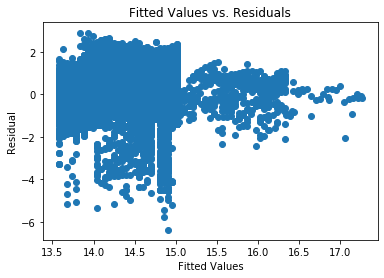

In [12]:
p = lm2.fittedvalues
res = lm2.resid
plt.scatter(p, res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
plt.savefig('../plot/regression_2_residual_model2.png', dpi = 300, bbox_inches = 'tight')

#### Model Selection using Adjusted R², Mallow's CP, AIC, BIC

In [13]:
from itertools import combinations
def fitModel(df, y, x):
    models = list()
    for i in range(1, len(x) + 1):
        comb = combinations(x, i)
        for params in comb:
            models.append(smf.ols(f'{ y } ~ { "+".join(params) }', data = df).fit())
    return models

In [14]:
models_salary = fitModel(data_log, 'Salary', col_salary)

In [15]:
r2a_salary = [(list(model.params.index)[1:], model.rsquared_adj) for model in models_salary]
sse_salary = [(list(model.params.index)[1:], sum(model.resid ** 2)) for model in models_salary]
mse_salary = [(list(model.params.index)[1:], model.mse_resid) for model in models_salary]
cp_salary = [(model[0], (model[1] / mse_salary[-1][1] + 2 * (len(model[0]) + 1) - data_log.shape[0])) for model in sse_salary]
aic_salary = [(list(model.params.index)[1:], model.aic) for model in models_salary]
bic_salary = [(list(model.params.index)[1:], model.bic) for model in models_salary]

In [16]:
table_salary = pd.DataFrame()
table_salary['Number of Predictors'] = [len(model[0]) for model in r2a_salary]
table_salary['Adjusted R-Squared'] = [model[1] for model in r2a_salary]
table_salary['Mallows CP'] = [model[1] for model in cp_salary]
table_salary['Predictors'] = [', '.join(model[0]) for model in r2a_salary]
table_salary['AIC'] = [model[1] for model in aic_salary]
table_salary['BIC'] = [model[1] for model in bic_salary]
print(th.md_table(table_salary.sort_values(by = 'Mallows CP').head().reset_index(), formats = {-1: 'c'}))

|   index |   Number of Predictors |   Adjusted R-Squared |   Mallows CP | Predictors                                                        |     AIC |     BIC |
|--------:|-----------------------:|---------------------:|-------------:|:------------------------------------------------------------------|--------:|:-------:|
|     225 |                      6 |             0.176143 |      5.31422 | Year, Potw, APG_Leader, PPG_Leader, RPG_Leader, WS_Leader         | 28505.1 | 28554.8 |
|     166 |                      5 |             0.176011 |      5.75517 | Year, Potw, APG_Leader, PPG_Leader, RPG_Leader                    | 28505.5 | 28548.1 |
|     218 |                      6 |             0.176037 |      6.47921 | Year, Potw, APG_Leader, MVP, PPG_Leader, RPG_Leader               | 28506.2 | 28556   |
|     250 |                      7 |             0.176073 |      7.08048 | Year, Potw, APG_Leader, PPG_Leader, RPG_Leader, Rookie, WS_Leader | 28506.8 | 28563.7 |
|     247 |           

#### Reduced Model -- Drop `MVP` and `Rookie`

In [17]:
reduced_col_salary = table_salary.iloc[225].Predictors.split(', ')
print(reduced_col_salary)

['Year', 'Potw', 'APG_Leader', 'PPG_Leader', 'RPG_Leader', 'WS_Leader']


In [18]:
formula_3 = f'Salary ~ {" + ".join(reduced_col_salary)}'
lm3 = smf.ols(formula_3, data = data_log).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     321.8
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:01:47   Log-Likelihood:                -14246.
No. Observations:                9003   AIC:                         2.851e+04
Df Residuals:                    8996   BIC:                         2.855e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -88.1433      2.963    -29.748      0.000     -93.951     -82.335
Year           0.0511      0.001     34.590      0.000       0.048       0.054
Potw           1.3246      0.056     23.453      0.000       1.214       1.435
APG_Leader     0.6636      0.296      2.241      0.025       0.083       1.244
PPG_Leader     0.5178      0.261      1.983      0.047       0.006       1.030
RPG_Leader     0.8778      0.225      3.894      0.000       0.436       1.320
WS_Leader      0.4165      0.267      1.563      0.118      -0.106       0.939
==============================================================================
Omnibus:                      843.220   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1295.231
Skew:                          -0.709   Prob(JB):                    5.55e-282
Kurtosis:                       4.200   Cond. No.                     4.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

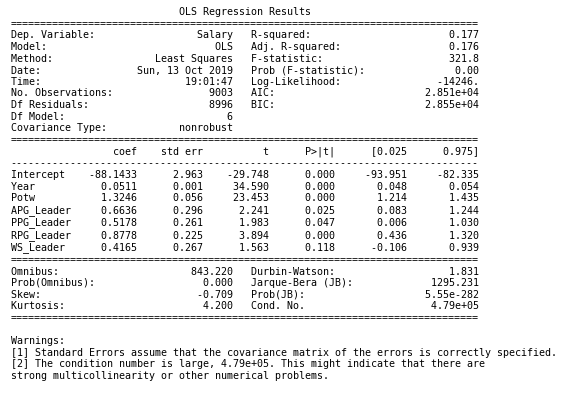

In [19]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm3.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_2_summary_model3.png', dpi = 300, bbox_inches = 'tight')

In [20]:
print(th.md_table(anova_lm(lm3).reset_index(), formats = {-1: 'c'}))

| index      |   df |      sum_sq |    mean_sq |          F |         PR(>F) |
|:-----------|-----:|------------:|-----------:|-----------:|:--------------:|
| Year       |    1 |  1709.68    | 1709.68    | 1232.18    |   4.21791e-253 |
| Potw       |    1 |   926.665   |  926.665   |  667.856   |   4.09393e-142 |
| APG_Leader |    1 |     6.77177 |    6.77177 |    4.88048 |   0.0271872    |
| PPG_Leader |    1 |    10.0137  |   10.0137  |    7.21698 |   0.00723497   |
| RPG_Leader |    1 |    22.3129  |   22.3129  |   16.0811  |   6.11763e-05  |
| WS_Leader  |    1 |     3.38751 |    3.38751 |    2.44141 |   0.118205     |
| Residual   | 8996 | 12482.1     |    1.38752 |  nan       | nan            |


#### Reduced Model -- Drop `MVP`,`Rookie` and `WS_Leader`

In [21]:
reduced2_col_salary = table_salary.iloc[166].Predictors.split(', ')
print(reduced2_col_salary)

['Year', 'Potw', 'APG_Leader', 'PPG_Leader', 'RPG_Leader']


In [22]:
formula_4 = f'Salary ~ {" + ".join(reduced2_col_salary)}'
lm4 = smf.ols(formula_4, data = data_log).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     385.6
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:01:48   Log-Likelihood:                -14247.
No. Observations:                9003   AIC:                         2.851e+04
Df Residuals:                    8997   BIC:                         2.855e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -88.1045      2.963    -29.734      0.000     -93.913     -82.296
Year           0.0511      0.001     34.575      0.000       0.048       0.054
Potw           1.3347      0.056     23.783      0.000       1.225       1.445
APG_Leader     0.6846      0.296      2.314      0.021       0.105       1.265
PPG_Leader     0.6752      0.241      2.802      0.005       0.203       1.147
RPG_Leader     0.9018      0.225      4.010      0.000       0.461       1.343
==============================================================================
Omnibus:                      842.383   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1293.724
Skew:                          -0.709   Prob(JB):                    1.18e-281
Kurtosis:                       4.200   Cond. No.                     4.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

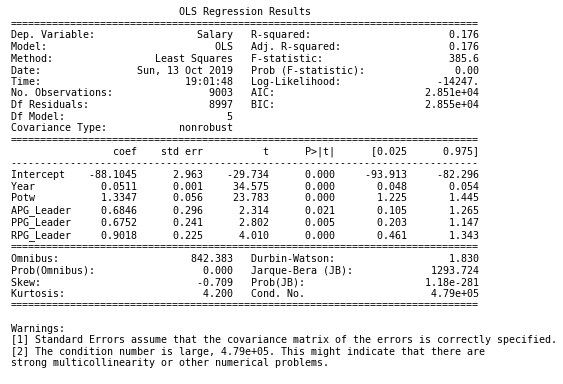

In [23]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm4.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_2_summary_model4.png', dpi = 300, bbox_inches = 'tight')

In [24]:
print(th.md_table(anova_lm(lm4).reset_index(), formats = {-1: 'c'}))

| index      |   df |      sum_sq |    mean_sq |          F |         PR(>F) |
|:-----------|-----:|------------:|-----------:|-----------:|:--------------:|
| Year       |    1 |  1709.68    | 1709.68    | 1231.98    |   4.58256e-253 |
| Potw       |    1 |   926.665   |  926.665   |  667.749   |   4.29787e-142 |
| APG_Leader |    1 |     6.77177 |    6.77177 |    4.8797  |   0.0271995    |
| PPG_Leader |    1 |    10.0137  |   10.0137  |    7.21582 |   0.00723963   |
| RPG_Leader |    1 |    22.3129  |   22.3129  |   16.0786  |   6.12594e-05  |
| Residual   | 8997 | 12485.5     |    1.38774 |  nan       | nan            |


#### Check for Influential Points -- Cook's Distance

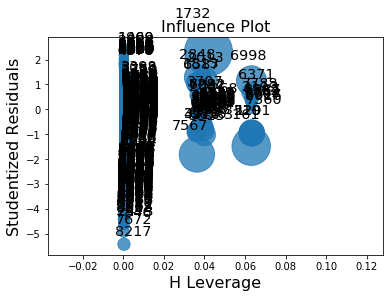

In [25]:
fig = sm.graphics.influence_plot(lm4)
plt.savefig('../plot/regression_2_influence.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [26]:
cooks = lm4.get_influence().cooks_distance[0]
seuil_cooks = 4 / (data.shape[0] - len(lm4.params))
atyp_cooks = np.abs(cooks) > seuil_cooks
outliers = list(data.index[pd.Series(atyp_cooks)])
print(len(outliers))

134


In [27]:
print(len(outliers) / data_log.shape[0])

0.014883927579695658


#### Remove Outliers

In [28]:
data_removed_outliers = data_log.loc[~data_log.index.isin(outliers)]

In [29]:
formula_5 = f'Salary ~ {" + ".join(reduced2_col_salary)}'
lm5 = smf.ols(formula_5, data = data_removed_outliers).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     447.8
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:02:13   Log-Likelihood:                -13599.
No. Observations:                8869   AIC:                         2.721e+04
Df Residuals:                    8863   BIC:                         2.725e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -92.9023      2.854    -32.550      0.000     -98.497     -87.307
Year           0.0535      0.001     37.586      0.000       0.051       0.056
Potw           1.4459      0.056     25.768      0.000       1.336       1.556
APG_Leader     0.6319      0.650      0.972      0.331      -0.642       1.906
PPG_Leader     0.5933      0.295      2.013      0.044       0.016       1.171
RPG_Leader     0.7595      0.283      2.684      0.007       0.205       1.314
==============================================================================
Omnibus:                      391.092   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.930
Skew:                          -0.496   Prob(JB):                    2.99e-101
Kurtosis:                       3.518   Cond. No.                     4.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

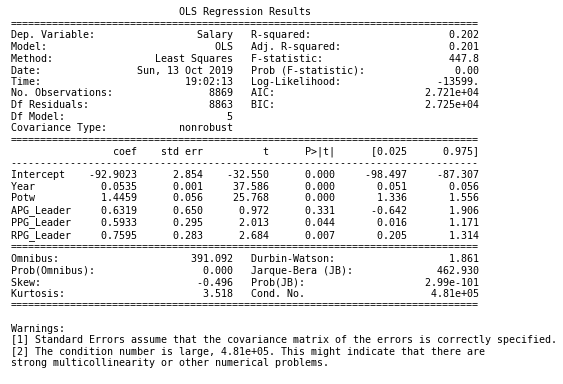

In [30]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm5.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_2_summary_model5.png', dpi = 300, bbox_inches = 'tight')

In [31]:
print(th.md_table(anova_lm(lm5).reset_index(), formats = {-1: 'c'}))

| index      |   df |      sum_sq |    mean_sq |           F |         PR(>F) |
|:-----------|-----:|------------:|-----------:|------------:|:--------------:|
| Year       |    1 |  1866.2     | 1866.2     | 1483.66     |   2.92382e-300 |
| Potw       |    1 |   935.444   |  935.444   |  743.696    |   2.5721e-157  |
| APG_Leader |    1 |     1.04749 |    1.04749 |    0.832772 |   0.361497     |
| PPG_Leader |    1 |     4.77119 |    4.77119 |    3.79319  |   0.051493     |
| RPG_Leader |    1 |     9.06309 |    9.06309 |    7.20534  |   0.00728222   |
| Residual   | 8863 | 11148.1     |    1.25783 |  nan        | nan            |


#### Check Heteroscedasticity -- Breusch-Pagan Test

In [32]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(lm4.resid, lm4.model.exog)
bp_test_table = pd.DataFrame(bp_test).T
bp_test_table.columns = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(th.md_table(bp_test_table, formats = {-1: 'c'}))

|   LM Statistic |   LM-Test p-value |   F-Statistic |   F-Test p-value |
|---------------:|------------------:|--------------:|:----------------:|
|         131.12 |        1.3766e-26 |       26.5939 |      8.87478e-27 |


#### Check Multicollinearity -- VIF

In [33]:
vif = pd.DataFrame()
vif['Features'] = reduced2_col_salary
vif['VIF Factor'] = [variance_inflation_factor(data[reduced2_col_salary].values, i)
                     for i in range(len(reduced2_col_salary))]
print(th.md_table(vif, formats = {-1: 'c'}))

| Features   |   VIF Factor |
|:-----------|:------------:|
| Year       |      1.0598  |
| Potw       |      1.12948 |
| APG_Leader |      1.00912 |
| PPG_Leader |      1.04567 |
| RPG_Leader |      1.02037 |


#### Check Multicollinearity -- Breusch-Godfrey Test

In [34]:
bg_test = sm.stats.diagnostic.acorr_breusch_godfrey(lm4)
bg_test_table = pd.DataFrame(bg_test).T
bg_test_table.columns = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(th.md_table(bg_test_table, formats = {-1: 'c'}))

|   LM Statistic |   LM-Test p-value |   F-Statistic |   F-Test p-value |
|---------------:|------------------:|--------------:|:----------------:|
|        209.138 |       2.76112e-26 |       5.91981 |      1.25427e-26 |


#### Check Normality

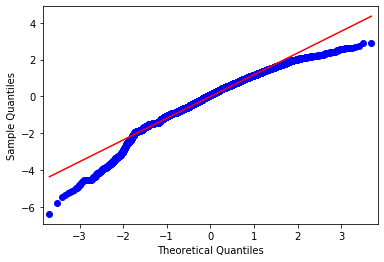

In [35]:
fig = sm.qqplot(lm4.resid, line = 's')
plt.savefig('../plot/regression_2_normality.png', dpi = 300, bbox_inches = 'tight')

#### Variable Intepretation

In [36]:
import math
beta_i = ['βi']
beta_i.extend(list(lm4.params.values))
e_beta_i = ['e^(βi)']
e_beta_i.extend([math.exp(par) for par in lm4.params])
beta_col = ['Type']
beta_col.extend(list(lm4.params.index))
beta = pd.DataFrame([beta_i, e_beta_i], columns = beta_col)
print(th.md_table(beta, formats = {-1: 'c'}))

| Type   |     Intercept |      Year |    Potw |   APG_Leader |   PPG_Leader |   RPG_Leader |
|:-------|--------------:|----------:|--------:|-------------:|-------------:|:------------:|
| βi     | -88.1045      | 0.0510719 | 1.33466 |     0.684587 |     0.675161 |     0.901754 |
| e^(βi) |   5.45361e-39 | 1.0524    | 3.79872 |     1.98295  |     1.96435  |     2.46392  |


**Prediction**

In [37]:
import math
# Predict in year 2020 a player's salary when he doesn't have any awards.
prdtor1 = np.array([1,2020,0,0,0,0])
prdtion1 = np.sum(lm4.params.values * prdtor1.T)
print(prdtor1)
print(math.exp(prdtion1))
result1 = list(prdtor1)
result1.append(round(math.exp(prdtion1),2))
result1

[   1 2020    0    0    0    0]
3473656.8302692324


[1, 2020, 0, 0, 0, 0, 3473656.83]

In [38]:
# Predict in year 2020 a player's salary when he only wins POTW.
prdtor2 = np.array([1,2020,1,0,0,0])
prdtion2 = np.sum(lm4.params.values * prdtor2.T)
print(prdtor2)
print(math.exp(prdtion2))
result2 =  list(prdtor2)
result2.append(round(math.exp(prdtion2),2))
result2

[   1 2020    1    0    0    0]
13195447.578768782


[1, 2020, 1, 0, 0, 0, 13195447.58]

In [39]:
# Predict in year 2020 a player's salary when he wins POTW as well as PPG Leader.
prdtor3 = np.array([1,2020,1,0,1,0])
prdtion3 = np.sum(lm4.params.values * prdtor3.T)
print(prdtor3)
print(math.exp(prdtion3))
result3 =  list(prdtor3)
result3.append(round(math.exp(prdtion3),2))
result3

[   1 2020    1    0    1    0]
25920463.518787738


[1, 2020, 1, 0, 1, 0, 25920463.52]

In [40]:
pred_col = list(lm4.params.index)
pred_col.append('Predicted Salary')
prediction_table = pd.DataFrame([result1, result2,result3], columns = pred_col)
print(th.md_table(prediction_table, formats = {-1: 'c'}, floatfmt=".2f"))

|   Intercept |    Year |   Potw |   APG_Leader |   PPG_Leader |   RPG_Leader |   Predicted Salary |
|------------:|--------:|-------:|-------------:|-------------:|-------------:|:------------------:|
|        1.00 | 2020.00 |   0.00 |         0.00 |         0.00 |         0.00 |         3473656.83 |
|        1.00 | 2020.00 |   1.00 |         0.00 |         0.00 |         0.00 |        13195447.58 |
|        1.00 | 2020.00 |   1.00 |         0.00 |         1.00 |         0.00 |        25920463.52 |
